In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter


import os


import warnings
warnings.filterwarnings("ignore")


import numpy as np

import random

import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

onefig_size = (10,4)
multifigs_size = (12,4)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
original_df = pd.read_csv('/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv')
original_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
original_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
original_df = pd.read_csv('/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv')
original_df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,259353,AAA Batteries (4-pack),3,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"
186848,259357,USB-C Charging Cable,1,11.95,9/30/2019 0:18,"250 Meadow St, San Francisco, CA 94016"


In [7]:
original_df = pd.read_csv('/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv')
original_df.describe(include='all').T

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,18,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


In [8]:
original_df = pd.read_csv('/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
original_df = pd.read_csv('/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv')
original_df.isnull().values.any(axis=1)

array([False, False, False, ..., False, False, False])

In [10]:
original_df = pd.read_csv('/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv')
original_df.isnull().sum().sum()

3264

In [11]:
original_df = original_df[original_df.isnull().values.any(axis=1)]
original_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
original_df= original_df.dropna(how = 'all')

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          0 non-null      object
 1   Product           0 non-null      object
 2   Quantity Ordered  0 non-null      object
 3   Price Each        0 non-null      object
 4   Order Date        0 non-null      object
 5   Purchase Address  0 non-null      object
dtypes: object(6)
memory usage: 0.0+ bytes


In [13]:
original_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:

j = 0
k = 0
l = 0

for i in range(0, len(original_df)):
    oid = original_df['Order ID'].iloc[i]
    odt = original_df['Order Date'].iloc[i]
    padd = original_df['Purchase Address'].iloc[i]
    if oid == 'Order ID':
        k = k+1
    if odt == 'Order Date':
        j = j+1
    if padd == 'Purchase Address':
        l = l+1
print("No of instances where column name is copied in the Order ID column:", k)
print("No of instances where column name is copied in the Order Date column:", j)
print("No of instances where column name is copied in the Purchase Address column:", l)

No of instances where column name is copied in the Order ID column: 0
No of instances where column name is copied in the Order Date column: 0
No of instances where column name is copied in the Purchase Address column: 0


In [15]:
temp_df =original_df[original_df['Order Date'] == 'Order Date']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
df = original_df.copy()

In [17]:
import pandas as pd


data_path = "/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv"  # Thay thế bằng đường dẫn thích hợp
df = pd.read_csv(data_path)


print("Dữ liệu ban đầu:")
print(df)


duplicates = df.duplicated()
duplicated_data = df[duplicates]


print("\nCác dòng dữ liệu bị trùng lặp:")
print(duplicated_data)


num_duplicates = len(duplicated_data.to_string(index=False))
print("\nTotal number of duplicate data lines:", num_duplicates)

duplicates_by_column = df.duplicated(subset=None, keep=False)
duplicated_data_by_column = df[duplicates_by_column]


print("\nCác dòng dữ liệu trùng lặp theo từng cột:")
print(duplicated_data_by_column)


num_duplicates_by_column = len(duplicated_data_by_column)
print("\nTổng số dòng dữ liệu trùng lặp theo từng cột:", num_duplicates_by_column)


Dữ liệu ban đầu:
       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186844   259353      AAA Batteries (4-pack)                3       2.99   
186845   259354                      iPhone                1        700   
186846   259355                      iPhone                1        700   
186847   259356      34in Ultrawide Monitor                1     379.99   
186848   259357        USB-C Charging Cable                1      11.95   

             Order Date                         Purchase Address  
0        4/19/2

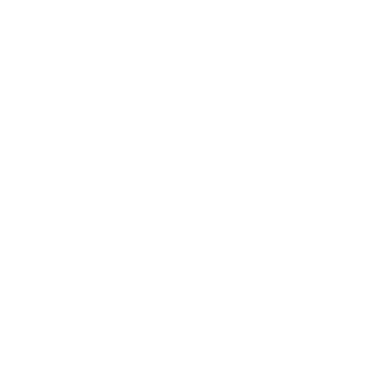

In [19]:
x = original_df['Product'].value_counts()
plt.pie(x.values,
		labels=x.index,
		autopct='%1.1f%%')
plt.show()



In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV (hoặc định dạng tệp khác)
data_path = "/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv"  # Thay thế bằng đường dẫn thích hợp
df = pd.read_csv(data_path)

# Thống kê giá trị trùng lặp
duplicates = df.duplicated()
duplicated_data = df[duplicates]

# Số lượng dòng dữ liệu trùng lặp
num_duplicates = len(duplicated_data)

# Hiển thị dữ liệu trùng lặp nằm ngang (horizontal)
print("Các dòng dữ liệu bị trùng lặp:")
print(duplicated_data.to_string(index=False))  # Thêm index=False để không hiển thị cột chỉ mục

# Hiển thị tổng số dòng dữ liệu trùng lặp
print("\nTổng số dòng dữ liệu trùng lặp:", num_duplicates)

# Thống kê giá trị trùng lặp của mỗi cột
duplicates_by_column = df.duplicated(subset=None, keep=False)
duplicated_data_by_column = df[duplicates_by_column]

# Số lượng dòng dữ liệu trùng lặp theo từng cột
num_duplicates_by_column = len(duplicated_data_by_column)

# Hiển thị dữ liệu trùng lặp theo từng cột nằm ngang (horizontal)
print("\nCác dòng dữ liệu trùng lặp theo từng cột:")
print(duplicated_data_by_column.to_string(index=False))  # Thêm index=False để không hiển thị cột chỉ mục

# Hiển thị tổng số dòng dữ liệu trùng lặp theo từng cột
print("\nTổng số dòng dữ liệu trùng lặp theo từng cột:", num_duplicates_by_column)


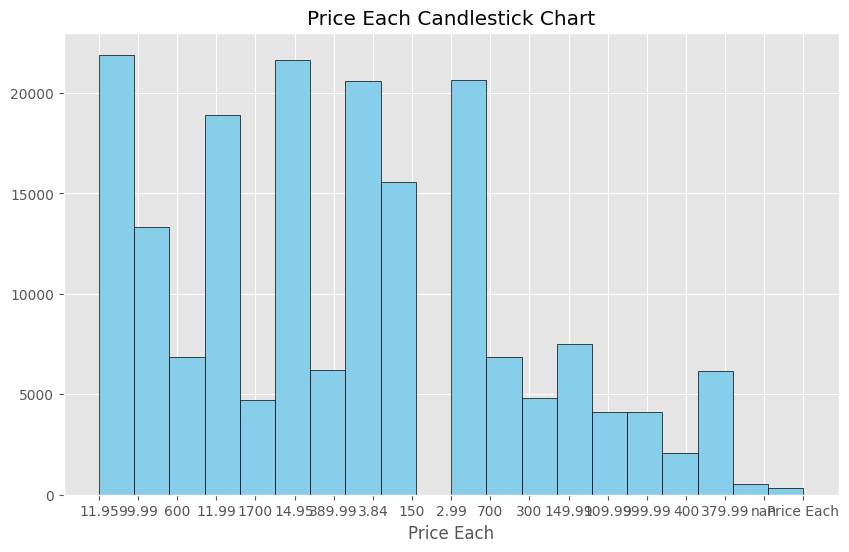

In [23]:
file_path = "/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv"


df = pd.read_csv(file_path)


prices = df['Price Each'].tolist()


plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Each')
plt.title('Price Each Candlestick Chart')
plt.grid(True)
plt.show()








In [24]:
file_path = "/content/drive/MyDrive/BUSINESS INTELLIGENCE/ASM2/Updated.csv"


df = pd.read_csv(file_path)

prices = df['Price Each']

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=prices,
                high=prices,
                low=prices,
                close=prices)])

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price Each')
fig.update_layout(title='Price Each Candlestick Chart',
                  xaxis_rangeslider_visible=False)

fig.show()

Output hidden; open in https://colab.research.google.com to view.